In [ ]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paari1263","key":"c2502a35cb19d3b9dab0bbb9869cd81f"}'}

In [ ]:
''' ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json '''

' ! mkdir ~/.kaggle\n! cp kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json '

In [ ]:
import os
''' ! kaggle datasets download -d shanks0465/braille-character-dataset -p /content/
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) '''

" ! kaggle datasets download -d shanks0465/braille-character-dataset -p /content/\nfor dirname, _, filenames in os.walk('/content'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename)) "

In [ ]:
''' !unzip /content/braille-character-dataset.zip -d /content/ '''

' !unzip /content/braille-character-dataset.zip -d /content/ '

In [ ]:
os.mkdir("/Final_Model/images/") 
"""/content/drive/MyDrive/Final_Model/images/"""
alpha = 'a'
for i in range(0, 26): 
    os.mkdir('/Final_Model/images/' + alpha)
    alpha = chr(ord(alpha) + 1)

rootdir = '/Final_Model/Braille Dataset/'
for file in os.listdir(rootdir):
    letter = file[0]
    copyfile(rootdir+file, '/Final_Model/images/' + letter + '/' + file)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('/Final_Model/images/',
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('/Final_Model/images/',
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('/Final_Model/BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=20,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)

Epoch 1/20
39/39 [==============================] - 6s 140ms/step - loss: 3.2756 - accuracy: 0.0417 - val_loss: 3.2423 - val_accuracy: 0.0385 - lr: 0.0010
Epoch 2/20
39/39 [==============================] - 5s 134ms/step - loss: 3.0833 - accuracy: 0.1178 - val_loss: 2.6377 - val_accuracy: 0.2372 - lr: 0.0010
Epoch 3/20
39/39 [==============================] - 5s 128ms/step - loss: 2.3040 - accuracy: 0.3293 - val_loss: 1.8948 - val_accuracy: 0.4487 - lr: 0.0010
Epoch 4/20
39/39 [==============================] - 5s 130ms/step - loss: 1.7182 - accuracy: 0.5024 - val_loss: 1.5499 - val_accuracy: 0.5288 - lr: 0.0010
Epoch 5/20
39/39 [==============================] - 6s 154ms/step - loss: 1.4421 - accuracy: 0.5970 - val_loss: 1.3596 - val_accuracy: 0.5897 - lr: 0.0010
Epoch 6/20
39/39 [==============================] - 5s 133ms/step - loss: 1.1964 - accuracy: 0.6699 - val_loss: 1.1352 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 7/20
39/39 [==============================] - 5s 122ms/step - lo

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 64)       283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 11, 11, 128)      8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                         

In [ ]:
model = load_model('/content/drive/MyDrive/Final_Model/BrailleNet.h5')
acc = model.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


model accuracy: 0.8654


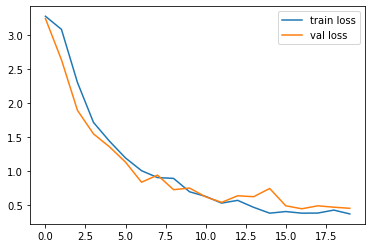

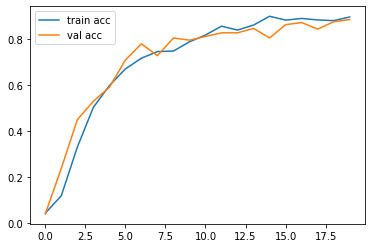

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
pred = model.predict(val_generator)
pred

array([[2.49020407e-18, 1.59245974e-15, 6.32968409e-15, ...,
        4.42187093e-06, 1.71645909e-11, 6.16505034e-08],
       [3.67550488e-33, 1.77120793e-23, 6.61552046e-30, ...,
        1.66302153e-10, 9.99594748e-01, 6.81219359e-10],
       [5.41606546e-15, 1.04964035e-14, 3.81847089e-11, ...,
        3.62314313e-05, 8.34000414e-15, 4.06903126e-07],
       ...,
       [1.78309905e-14, 1.51829883e-13, 1.14284485e-11, ...,
        3.82532006e-09, 3.28400230e-14, 2.37721642e-09],
       [2.21085998e-06, 4.67925474e-07, 1.36340088e-06, ...,
        1.48500927e-04, 7.84704142e-08, 3.83888669e-02],
       [1.18230710e-05, 1.27170922e-03, 3.82464095e-05, ...,
        3.41029249e-08, 3.54855631e-13, 6.93899301e-06]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/Final_Model/Braille Dataset/a1.JPG0dim.jpg')

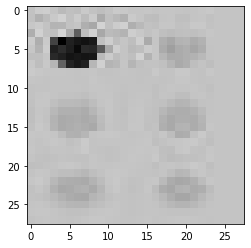

In [ ]:
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)
x

array([[[194., 194., 194.],
        [204., 204., 204.],
        [206., 206., 206.],
        ...,
        [196., 196., 196.],
        [196., 196., 196.],
        [196., 196., 196.]],

       [[193., 193., 193.],
        [177., 177., 177.],
        [188., 188., 188.],
        ...,
        [196., 196., 196.],
        [196., 196., 196.],
        [196., 196., 196.]],

       [[199., 199., 199.],
        [203., 203., 203.],
        [195., 195., 195.],
        ...,
        [196., 196., 196.],
        [196., 196., 196.],
        [196., 196., 196.]],

       ...,

       [[196., 196., 196.],
        [197., 197., 197.],
        [195., 195., 195.],
        ...,
        [196., 196., 196.],
        [196., 196., 196.],
        [196., 196., 196.]],

       [[197., 197., 197.],
        [198., 198., 198.],
        [198., 198., 198.],
        ...,
        [196., 196., 196.],
        [196., 196., 196.],
        [196., 196., 196.]],

       [[194., 194., 194.],
        [196., 196., 196.],
        [197., 1

In [ ]:
x.shape

(28, 28, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
model.predict(x)

array([[5.5862677e-01, 2.1141800e-01, 4.8854411e-02, 2.9717885e-05,
        2.3294645e-04, 6.2628112e-07, 9.2705790e-07, 2.9064037e-07,
        1.8341190e-03, 4.3888967e-08, 9.5443167e-02, 4.4497184e-09,
        1.8250893e-06, 3.7476659e-06, 1.7699833e-06, 4.9896571e-06,
        4.8586352e-10, 2.2238697e-05, 6.4245723e-02, 5.2216172e-11,
        1.9278366e-02, 2.9760919e-10, 2.4854992e-17, 5.0849110e-08,
        3.7806585e-12, 2.3948022e-07]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)
a

array([0])